### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from IPython.display import Image
import pydotplus
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [2]:
# Importing necessary library for data handling
import pandas as pd
# Reading the CSV file into a pandas DataFrame
row_data = pd.read_csv("Salary_Data_Based_country_and_race.csv")
# Displaying the first few rows of the dataset to understand its structure
row_data.head()


Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  Senior  
0                  5.0   90000.0      UK     White       0  
1                  3.0   65000.0     USA  Hispanic       0  
2                 15.0  150000.0  Canada     White       1  
3                  7.0   60000.0     USA  Hispanic       0  
4                 20.0  200000.0     USA     Asian       0

In [3]:
# Dropping the unnecessary 'Unnamed: 0' column
row_data = row_data.drop('Unnamed: 0', axis=1)

In [5]:
# Displaying information about the dataset 
print(row_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
 8   Senior               6704 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB
None


In [6]:
# Displaying statistical summary of the numerical columns in the dataset
print(row_data.describe())

               Age  Years of Experience         Salary       Senior
count  6702.000000          6701.000000    6699.000000  6704.000000
mean     33.620859             8.094687  115326.964771     0.145286
std       7.614633             6.059003   52786.183911     0.352416
min      21.000000             0.000000     350.000000     0.000000
25%      28.000000             3.000000   70000.000000     0.000000
50%      32.000000             7.000000  115000.000000     0.000000
75%      38.000000            12.000000  160000.000000     0.000000
max      62.000000            34.000000  250000.000000     1.000000


In [7]:
# Displaying the shape of the DataFrame (number of rows and columns)
print(f"DataFrame Shape: {row_data.shape}")

DataFrame Shape: (6704, 9)


In [8]:
# Checking for missing values in the dataset and counting the number of missing values per column
row_data.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
Senior                 0
dtype: int64

In [9]:
# Fill missing numeric values with the median
row_data['Salary'] = row_data['Salary'].fillna(row_data['Salary'].median())

# Fill missing categorical values with the mode
row_data['Job Title'] = row_data['Job Title'].fillna(row_data['Job Title'].mode()[0])

# Drop rows with significant missing data
row_data = row_data.dropna()

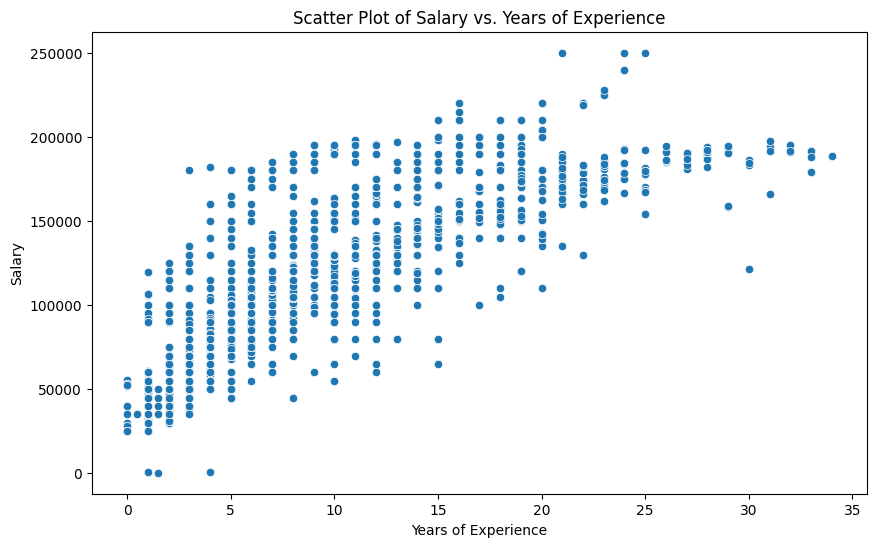

In [10]:
# Scatter plot of Salary vs. Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x=row_data['Years of Experience'], y=row_data['Salary'])
plt.title('Scatter Plot of Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [11]:
Q1 = row_data['Salary'].quantile(0.25)
Q3 = row_data['Salary'].quantile(0.75)
IQR = Q3 - Q1
row_data = row_data[(row_data['Salary'] >= Q1 - 1.5 * IQR) & (row_data['Salary'] <= Q3 + 1.5 * IQR)]

In [12]:
# Function to standardize bachelor's degree
def standardize_bachelors(education):
    return re.sub(r"\b(bachelor['s]?)( degree)?\b", "Bachelor's Degree", education, flags=re.IGNORECASE)

# Apply the function to the Education column
row_data['Education Level'] = row_data['Education Level'].apply(standardize_bachelors)

In [13]:
# Function to standardize master's degree
def standardize_masters(education):
    return re.sub(r"\b(master['s]?)( degree)?\b", "Master's Degree", education, flags=re.IGNORECASE)
# Apply the function to the Education column
row_data['Education Level'] = row_data['Education Level'].apply(standardize_masters)
# Display the result
print(row_data)

       Age  Gender            Education Level              Job Title  \
0     32.0    Male         Bachelor's Degrees      Software Engineer   
1     28.0  Female           Master's Degrees           Data Analyst   
2     45.0    Male                        PhD         Senior Manager   
3     36.0  Female         Bachelor's Degrees        Sales Associate   
4     52.0    Male           Master's Degrees               Director   
...    ...     ...                        ...                    ...   
6699  49.0  Female                        PhD  Director of Marketing   
6700  32.0    Male                High School        Sales Associate   
6701  30.0  Female  Bachelor's Degrees Degree      Financial Manager   
6702  46.0    Male    Master's Degrees Degree      Marketing Manager   
6703  26.0  Female                High School        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0

In [14]:
# Displaying the shape of the dataset (number of rows and columns)
row_data.shape

(6700, 9)

In [15]:
# Checking for duplicate rows in the dataset
row_data.duplicated().sum()

np.int64(1414)

In [16]:
# Displaying the first few rows of the dataset
row_data.head()

Age  Gender     Education Level          Job Title  Years of Experience  \
0  32.0    Male  Bachelor's Degrees  Software Engineer                  5.0   
1  28.0  Female    Master's Degrees       Data Analyst                  3.0   
2  45.0    Male                 PhD     Senior Manager                 15.0   
3  36.0  Female  Bachelor's Degrees    Sales Associate                  7.0   
4  52.0    Male    Master's Degrees           Director                 20.0   

     Salary Country      Race  Senior  
0   90000.0      UK     White       0  
1   65000.0     USA  Hispanic       0  
2  150000.0  Canada     White       1  
3   60000.0     USA  Hispanic       0  
4  200000.0     USA     Asian       0

In [17]:
# Scaling the 'Salary' and 'Years of Experience' columns using MinMaxScaler to normalize the values
from sklearn.preprocessing import MinMaxScaler
data = row_data.copy()
scaler = MinMaxScaler()
data[['Salary', 'Years of Experience']] = scaler.fit_transform(data[['Salary', 'Years of Experience']])


In [18]:
# Validate data
data = data[(data['Age'] > 0) & (data['Salary'] > 0)]

In [19]:
# Check for non-numeric salary entries
invalid_salaries = data[~data['Salary'].astype(str).str.match(r'^\d+(\.\d+)?$', na=False)]
invalid_salaries

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary, Country, Race, Senior]
Index: []

In [20]:
# Standardize job titles by removing special characters and capitalizing each word
data['Job Title Cleaned'] = data['Job Title'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.title()
# Display a sample of cleaned job titles
data[['Job Title', 'Job Title Cleaned']].head()

Job Title  Job Title Cleaned
0  Software Engineer  Software Engineer
1       Data Analyst       Data Analyst
2     Senior Manager     Senior Manager
3    Sales Associate    Sales Associate
4           Director           Director

In [21]:
# Extract seniority levels from job titles
data['Seniority'] = data['Job Title'].str.extract(r'\b(Senior|Junior|Financial)\b', expand=False)
# Display a sample of extracted seniority levels
data[['Job Title', 'Seniority']].head()

Job Title Seniority
0  Software Engineer       NaN
1       Data Analyst       NaN
2     Senior Manager    Senior
3    Sales Associate       NaN
4           Director       NaN

In [22]:
# Filter for job titles containing 'Engineer'
engineer_jobs = data[data['Job Title'].str.contains(r'\bEngineer\b', na=False)]
# Display a sample of engineering jobs
engineer_jobs.head()

Age Gender     Education Level          Job Title  Years of Experience  \
0   32.0   Male  Bachelor's Degrees  Software Engineer             0.147059   
17  39.0   Male                 PhD    Senior Engineer             0.352941   
37  42.0   Male    Master's Degrees   Project Engineer             0.411765   
42  30.0   Male  Bachelor's Degrees   Network Engineer             0.088235   
57  43.0   Male                 PhD    Senior Engineer             0.500000   

      Salary Country      Race  Senior  Job Title Cleaned Seniority  
0   0.359103      UK     White       0  Software Engineer       NaN  
17  0.459243      UK     Mixed       1    Senior Engineer    Senior  
37  0.459243   China     White       0   Project Engineer       NaN  
42  0.238935   China    Korean       0   Network Engineer       NaN  
57  0.559383     USA  Hispanic       1    Senior Engineer    Senior

In [23]:
data.duplicated().sum()

np.int64(1414)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_edu = LabelEncoder()
le_gender = LabelEncoder()
le_job = LabelEncoder()
le_country = LabelEncoder()
le_race = LabelEncoder()
# Encode using the fitted encoder
data['Education Level'] = le_edu.fit_transform(data['Education Level'])
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Job Title'] = le_job.fit_transform(data['Job Title'])
data['Country'] = le_country.fit_transform(data['Country'])
data['Race'] = le_race.fit_transform(data['Race'])

In [25]:
data.duplicated().sum()

np.int64(1414)

In [26]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [27]:
data.head()

Age  Gender  Education Level  Job Title  Years of Experience    Salary  \
0  32.0       1                0        175             0.147059  0.359103   
1  28.0       0                3         18             0.088235  0.258963   
2  45.0       1                5        144             0.441176  0.599439   
3  36.0       0                0        115             0.205882  0.238935   
4  52.0       1                3         25             0.588235  0.799720   

   Country  Race  Senior  Job Title Cleaned Seniority  
0        3     9       0  Software Engineer       NaN  
1        4     5       0       Data Analyst       NaN  
2        1     9       1     Senior Manager    Senior  
3        4     5       0    Sales Associate       NaN  
4        4     1       0           Director       NaN

### Clustering
#### First: K-means Clustering
##### 1. Years of Experience and Salary

In [28]:
# select features and decode them
X = scaler.inverse_transform(data[['Salary', 'Years of Experience']])

In [29]:
# Ignore all warnings
import warnings
warnings.simplefilter('ignore')

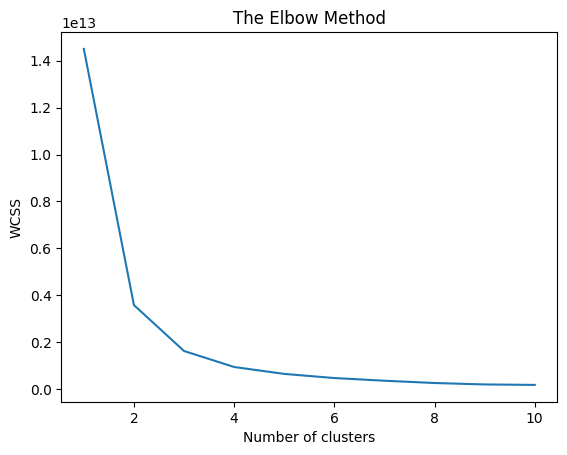

In [30]:
# Use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = [] # Within-Cluster Sum of Squares distances between each point and its cluster centroid
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# from plot i will choose to make 3 clusters
# Training the K-Means model on the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

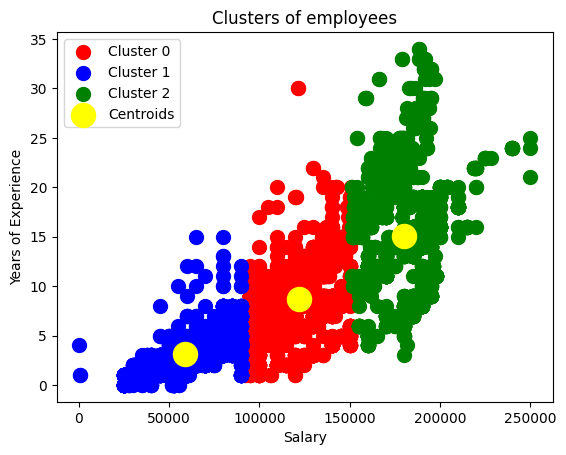

In [32]:
# visualize clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees')
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.legend()
plt.show()

In [33]:
print("Experience from", int(min(X[y_kmeans == 0, 1])), "to", int(max(X[y_kmeans == 0, 1])), "years:")
print("Have salary from", min(X[y_kmeans == 0, 0]), "to", max(X[y_kmeans == 0, 0]))
print("Experience from", int(min(X[y_kmeans == 1, 1])), "to", int(max(X[y_kmeans == 1, 1])), "years:")
print("Have salary from", min(X[y_kmeans == 1, 0]), "to", max(X[y_kmeans == 1, 0]))
print("Experience from", int(min(X[y_kmeans == 2, 1])), "to", int(max(X[y_kmeans == 2, 1])), "years")
print("Have salary from", min(X[y_kmeans == 2, 0]), "to", max(X[y_kmeans == 2, 0]))

Experience from 1 to 30 years:
Have salary from 90944.0 to 150901.0
Experience from 0 to 15 years:
Have salary from 500.0 to 90452.0
Experience from 2 to 34 years
Have salary from 151078.0 to 249999.99999999997


##### 2. Age and Salary

In [34]:
# select features
X = np.column_stack((X[:,0], data['Age'].to_numpy()))

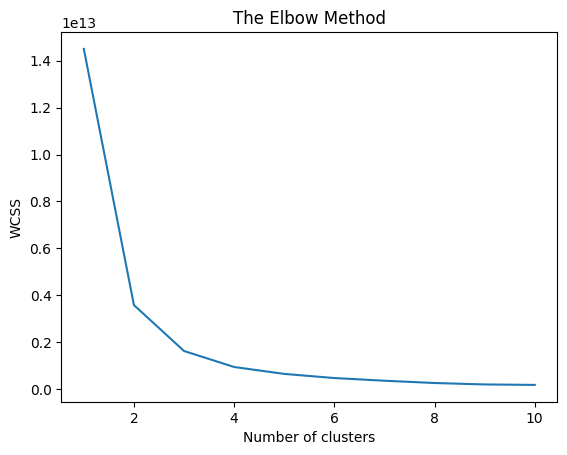

In [35]:
# Use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = [] # Within-Cluster Sum of Squares distances between each point and its cluster centroid
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# from plot i will choose to make 3 clusters
# Training the K-Means model on the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

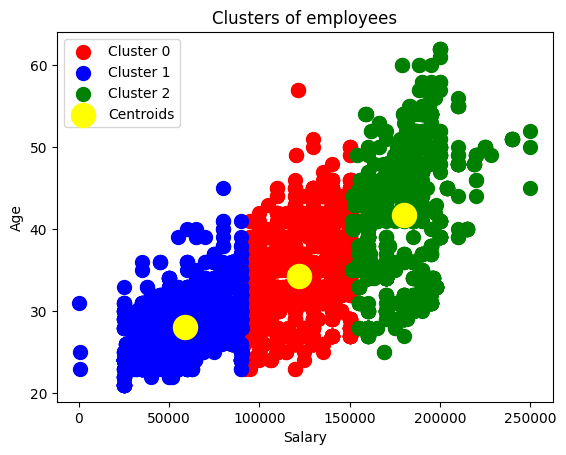

In [37]:
# visualize clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

In [38]:
print("Age from", int(min(X[y_kmeans == 0, 1])), "to", int(max(X[y_kmeans == 0, 1])), "years:")
print("Have salary from", min(X[y_kmeans == 0, 0]), "to", max(X[y_kmeans == 0, 0]))
print("Age from", int(min(X[y_kmeans == 1, 1])), "to", int(max(X[y_kmeans == 1, 1])), "years:")
print("Have salary from", min(X[y_kmeans == 1, 0]), "to", max(X[y_kmeans == 1, 0]))
print("Age from", int(min(X[y_kmeans == 2, 1])), "to", int(max(X[y_kmeans == 2, 1])), "years")
print("Have salary from", min(X[y_kmeans == 2, 0]), "to", max(X[y_kmeans == 2, 0]))

Age from 23 to 57 years:
Have salary from 90944.0 to 150901.0
Age from 21 to 45 years:
Have salary from 500.0 to 90452.0
Age from 25 to 62 years
Have salary from 151078.0 to 249999.99999999997


#### Second: Hierarchical Clustering
##### 1. Education Level and Job Title

In [39]:
# select features
X = data[['Job Title Cleaned', 'Education Level']]
# Encode categorical features
label_encoder_education = LabelEncoder()
label_encoder_job = LabelEncoder()
X['Education Level'] = label_encoder_education.fit_transform(X['Education Level'])
X['Job Title Cleaned'] = label_encoder_job.fit_transform(X['Job Title Cleaned'])

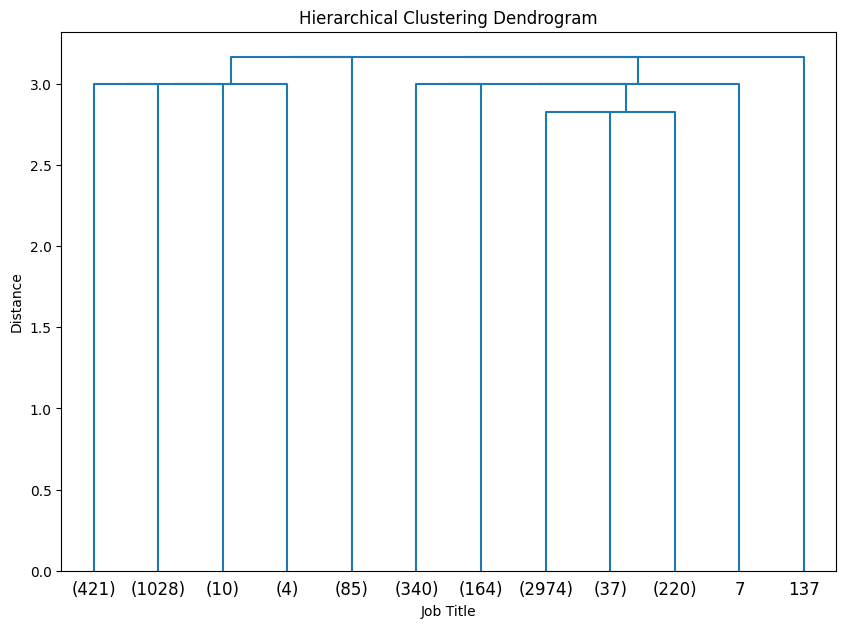

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(X, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=X['Job Title Cleaned'].values, orientation='top', distance_sort='descending',
           truncate_mode='lastp', p=12, show_leaf_counts=True)
# plt.xticks(rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Job Title')
plt.ylabel('Distance')
plt.show()

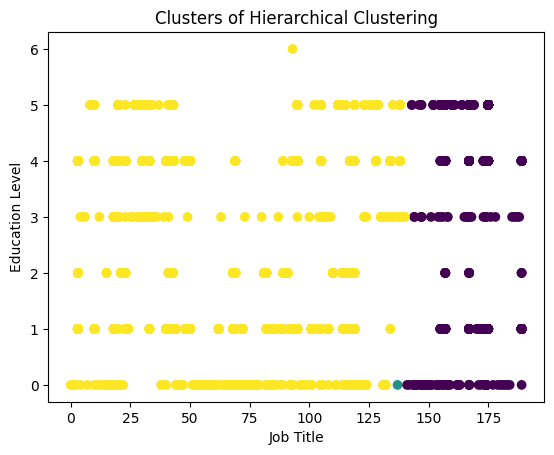

In [41]:
from sklearn.cluster import AgglomerativeClustering

# perform Hierarchical clustering using euclidean distance and single linkage
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(X)

# plot clusters
plt.scatter(X['Job Title Cleaned'], X['Education Level'], c=labels)
plt.title('Clusters of Hierarchical Clustering')
plt.xlabel('Job Title')
plt.ylabel('Education Level')
plt.show()

##### 2. Country and Race

In [42]:
# select features
X = data[['Country', 'Race']]

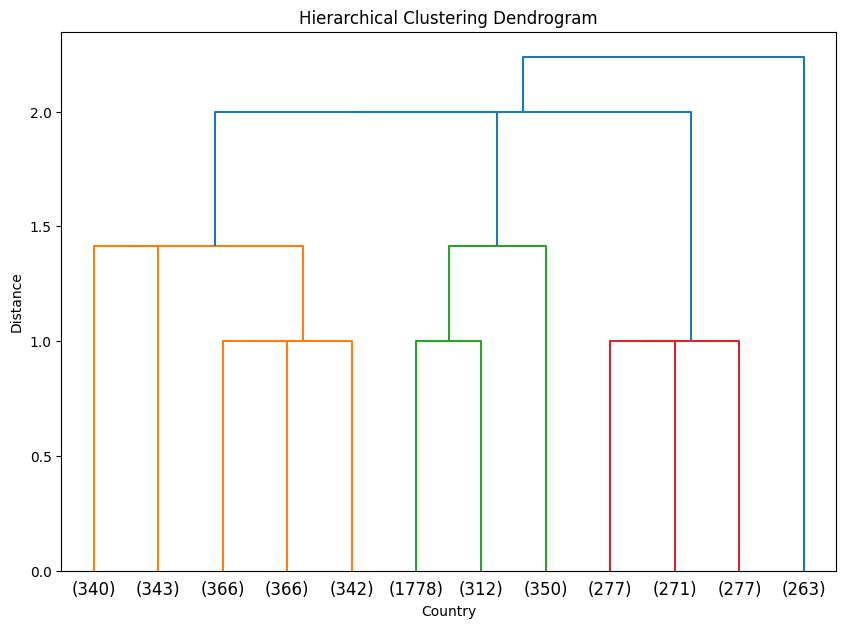

In [43]:
# Perform hierarchical clustering
linked = linkage(X, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=X['Country'].values, orientation='top', distance_sort='descending',
           truncate_mode='lastp', p=12, show_leaf_counts=True)
# plt.xticks(rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

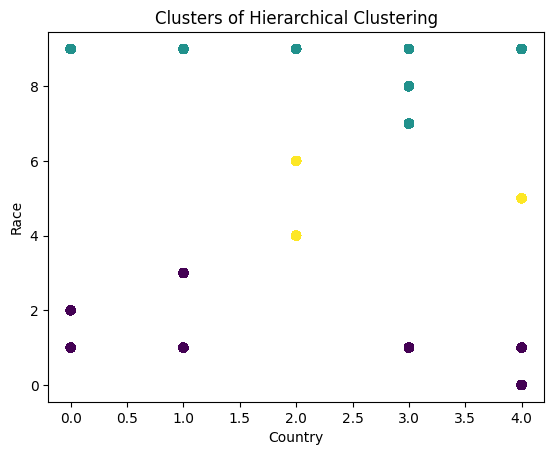

In [44]:
# perform Hierarchical clustering using manhattan distance and complete linkage
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='complete')
labels = hierarchical_cluster.fit_predict(X)

# plot clusters
plt.scatter(X['Country'], X['Race'], c=labels)
plt.title('Clusters of Hierarchical Clustering')
plt.xlabel('Country')
plt.ylabel('Race')
plt.show()

In [45]:
tree_data=data.iloc[:, :-3]
print(tree_data.head())


    Age  Gender  Education Level  Job Title  Years of Experience    Salary  \
0  32.0       1                0        175             0.147059  0.359103   
1  28.0       0                3         18             0.088235  0.258963   
2  45.0       1                5        144             0.441176  0.599439   
3  36.0       0                0        115             0.205882  0.238935   
4  52.0       1                3         25             0.588235  0.799720   

   Country  Race  
0        3     9  
1        4     5  
2        1     9  
3        4     5  
4        4     1  


In [46]:
# Categorize 'Salary' into three classes: 'Low', 'Medium', 'High'
tree_data['Salary Class'] = pd.qcut(tree_data['Salary'], q=3, labels=['Low', 'Medium', 'High'])

# Separate features and target variable
X = tree_data.drop(['Salary', 'Salary Class' ], axis=1)
y = tree_data['Salary Class']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # Ensure balanced splits

# Displaying the first few rows of the tree_data DataFrame
print(tree_data.head())


    Age  Gender  Education Level  Job Title  Years of Experience    Salary  \
0  32.0       1                0        175             0.147059  0.359103   
1  28.0       0                3         18             0.088235  0.258963   
2  45.0       1                5        144             0.441176  0.599439   
3  36.0       0                0        115             0.205882  0.238935   
4  52.0       1                3         25             0.588235  0.799720   

   Country  Race Salary Class  
0        3     9       Medium  
1        4     5          Low  
2        1     9         High  
3        4     5          Low  
4        4     1         High  


Confusion Matrix (Training Data) [max_depth=3, min_samples_split=2, criterion=gini]:
 [[1203   16  184]
 [  32 1228  168]
 [ 348  123  926]]
Confusion Matrix (Testing Data) [max_depth=3, min_samples_split=2, criterion=gini]:
 [[315   5  31]
 [  8 315  34]
 [ 86  27 236]]
Classification Report (Training Data) [max_depth=3, min_samples_split=2, criterion=gini]:
               precision    recall  f1-score   support

        High       0.76      0.86      0.81      1403
         Low       0.90      0.86      0.88      1428
      Medium       0.72      0.66      0.69      1397

    accuracy                           0.79      4228
   macro avg       0.79      0.79      0.79      4228
weighted avg       0.79      0.79      0.79      4228

Classification Report (Testing Data) [max_depth=3, min_samples_split=2, criterion=gini]:
               precision    recall  f1-score   support

        High       0.77      0.90      0.83       351
         Low       0.91      0.88      0.89       357
   

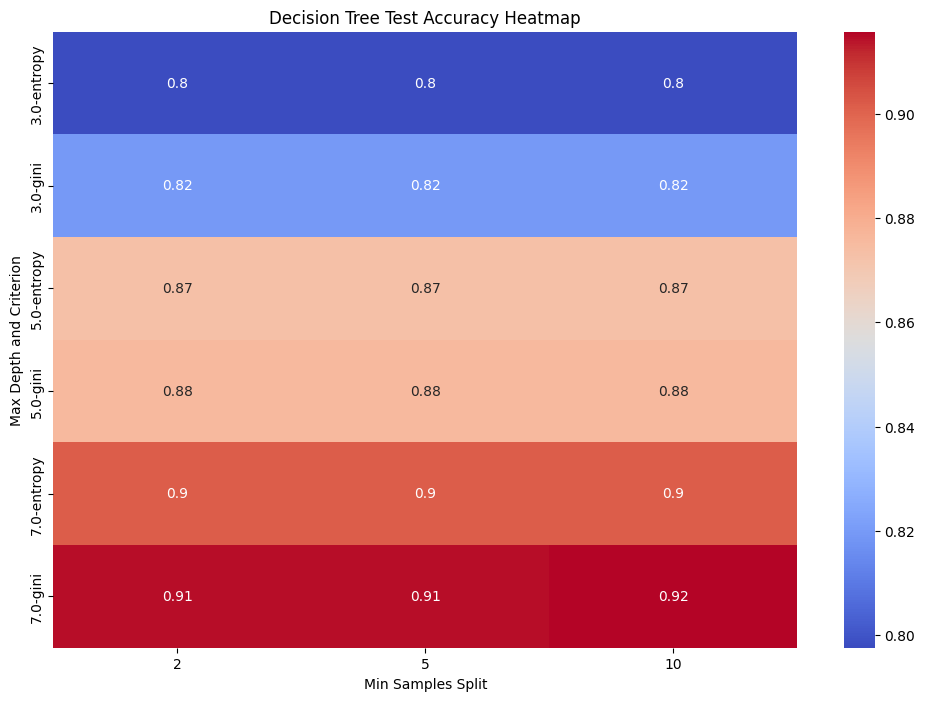

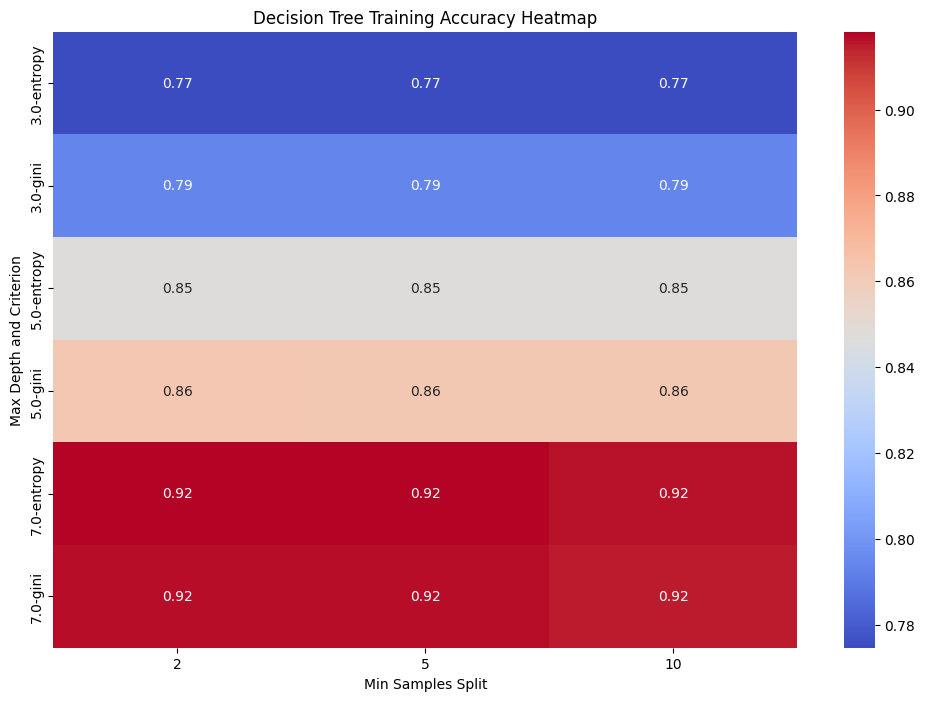

The best model is: 
max_depth                 NaN
min_samples_split          10
criterion                gini
train_accuracy       0.973037
test_accuracy        0.960265
Name: 22, dtype: object


In [47]:
# Define the hyperparameters for grid search
max_depth_values = [3, 5, 7, None]  
min_samples_split_values = [2, 5, 10]  
criteria = ['gini', 'entropy'] 

# Store results for visualization
results = []

# Perform the Decision Tree classifier over all combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for criterion in criteria:
            # Initialize the Decision Tree classifier with the current hyperparameters
            classtree = tree.DecisionTreeClassifier(max_depth=max_depth, 
                                                    min_samples_split=min_samples_split,
                                                    criterion=criterion)
            
            # Train the model on the training dataset
            classtree.fit(X_train, y_train)
            
            # Generate predictions for training and testing datasets
            y_train_pred = classtree.predict(X_train)
            y_test_pred = classtree.predict(X_test)
            
            # Store classification results for visualization
            train_accuracy = classtree.score(X_train, y_train)
            test_accuracy = classtree.score(X_test, y_test)
            
            results.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'criterion': criterion,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy
            })
            
            # Display the confusion matrix for training data
            print(f"Confusion Matrix (Training Data) [max_depth={max_depth}, min_samples_split={min_samples_split}, criterion={criterion}]:\n", 
                  confusion_matrix(y_train, y_train_pred))
            
            # Display the confusion matrix for testing data
            print(f"Confusion Matrix (Testing Data) [max_depth={max_depth}, min_samples_split={min_samples_split}, criterion={criterion}]:\n", 
                  confusion_matrix(y_test, y_test_pred))
            
            # Display the classification report for training data
            print(f"Classification Report (Training Data) [max_depth={max_depth}, min_samples_split={min_samples_split}, criterion={criterion}]:\n", 
                  classification_report(y_train, y_train_pred))
            
            # Display the classification report for testing data
            print(f"Classification Report (Testing Data) [max_depth={max_depth}, min_samples_split={min_samples_split}, criterion={criterion}]:\n", 
                  classification_report(y_test, y_test_pred))

# Create a DataFrame from results for better visualization
results_df = pd.DataFrame(results)

# Plotting the results for visual comparison
plt.figure(figsize=(12, 8))  # Adjusting the figure size for consistency

# Plot the test accuracy for each combination of hyperparameters
test_accuracy_pivot = results_df.pivot_table(index=["max_depth", "criterion"], columns="min_samples_split", values="test_accuracy")
sns.heatmap(test_accuracy_pivot, annot=True, cmap="coolwarm", cbar=True)
plt.title("Decision Tree Test Accuracy Heatmap")
plt.xlabel("Min Samples Split")
plt.ylabel("Max Depth and Criterion")
plt.show()

# Visualize the training accuracy similarly
plt.figure(figsize=(12, 8))  # Matching figure size with the test accuracy plot
train_accuracy_pivot = results_df.pivot_table(index=["max_depth", "criterion"], columns="min_samples_split", values="train_accuracy")
sns.heatmap(train_accuracy_pivot, annot=True, cmap="coolwarm", cbar=True)
plt.title("Decision Tree Training Accuracy Heatmap")
plt.xlabel("Min Samples Split")
plt.ylabel("Max Depth and Criterion")
plt.show()

# Identify the best performing model based on the highest test accuracy
best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
print(f"The best model is: \n{best_model}")


In [48]:
# Initialize the DecisionTreeClassifier
classtree = tree.DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # List of possible values for the maximum depth of the tree
    'max_leaf_nodes': [5, 10, 20, 30, None],  # List of possible values for the maximum number of leaf nodes
    'min_samples_split': [2, 3, 4, 5, 10],  # List of possible values for the minimum number of samples required to split an internal node
    'criterion': ['gini', 'entropy']  # List of criteria to measure the quality of a split (Gini or Entropy)
}

# Perform GridSearchCV to find the best parameters using cross-validation
grid_search = GridSearchCV(estimator=classtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters based on the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)  # Print the best parameters
print("Best accuracy:", grid_search.best_score_)  # Print the best cross-validation accuracy

# Define a new DecisionTreeClassifier using the best hyperparameters
best_classtree = tree.DecisionTreeClassifier(
    max_depth=best_params['max_depth'],  # Set the best max_depth
    max_leaf_nodes=best_params['max_leaf_nodes'],  # Set the best max_leaf_nodes
    min_samples_split=best_params['min_samples_split'],  # Set the best min_samples_split
    criterion=best_params['criterion']  # Set the best criterion (Gini or Entropy)
)

# Train the model using the best parameters
best_classtree.fit(X_train, y_train)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 2}
Best accuracy: 0.9354290989970204


DecisionTreeClassifier()

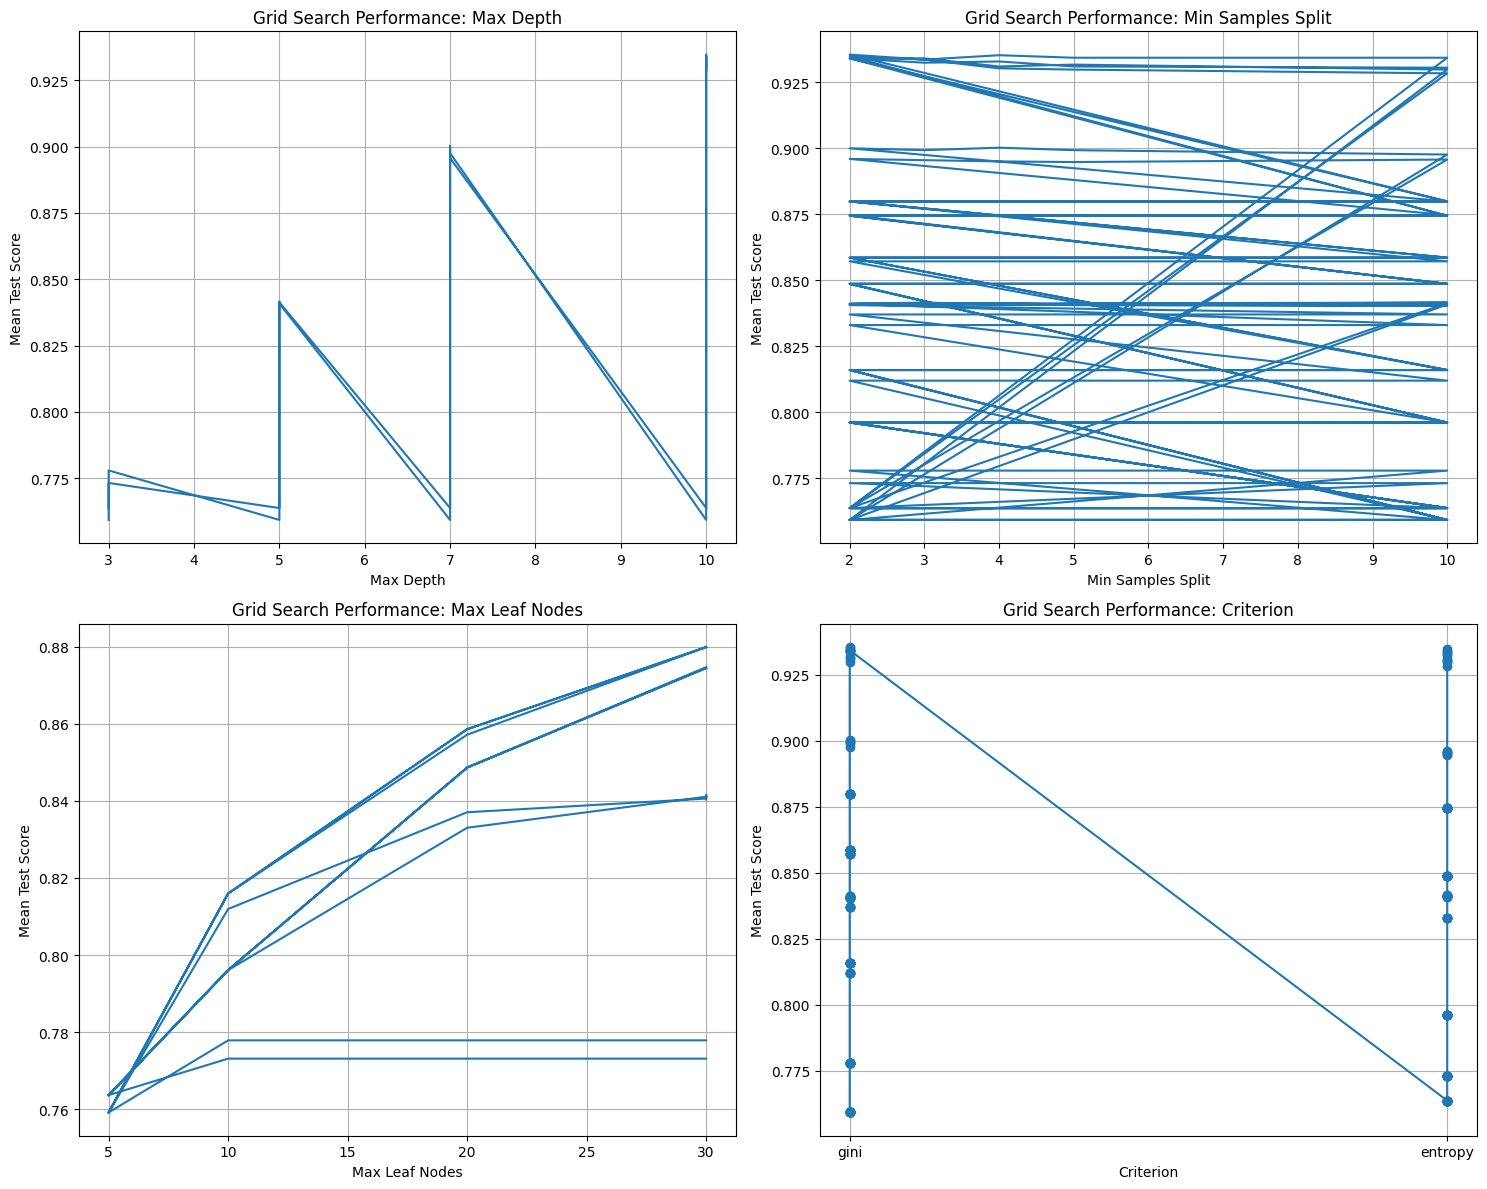

In [49]:
results = grid_search.cv_results_
# Set up a 2x2 grid for the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot max_depth vs mean_test_score
axs[0, 0].plot(results['param_max_depth'], results['mean_test_score'], label="Mean Test Score")
axs[0, 0].set_xlabel('Max Depth')
axs[0, 0].set_ylabel('Mean Test Score')
axs[0, 0].set_title('Grid Search Performance: Max Depth')
axs[0, 0].grid(True)

# Plot min_samples_split vs mean_test_score
axs[0, 1].plot(results['param_min_samples_split'], results['mean_test_score'], label="Mean Test Score")
axs[0, 1].set_xlabel('Min Samples Split')
axs[0, 1].set_ylabel('Mean Test Score')
axs[0, 1].set_title('Grid Search Performance: Min Samples Split')
axs[0, 1].grid(True)

# Plot max_leaf_nodes vs mean_test_score
axs[1, 0].plot(results['param_max_leaf_nodes'], results['mean_test_score'], label="Mean Test Score")
axs[1, 0].set_xlabel('Max Leaf Nodes')
axs[1, 0].set_ylabel('Mean Test Score')
axs[1, 0].set_title('Grid Search Performance: Max Leaf Nodes')
axs[1, 0].grid(True)

# Plot criterion vs mean_test_score
axs[1, 1].plot(results['param_criterion'], results['mean_test_score'], marker='o', label="Mean Test Score")
axs[1, 1].set_xlabel('Criterion')
axs[1, 1].set_ylabel('Mean Test Score')
axs[1, 1].set_title('Grid Search Performance: Criterion')
axs[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
#Plotting a decision tree
# Exporting the decision tree structure to DOT format
dot_data = tree.export_graphviz(best_classtree, out_file=None, feature_names=X_train.columns, filled=True)
# Creating a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)
# Displaying the decision tree as an image
Image(graph.create_png())


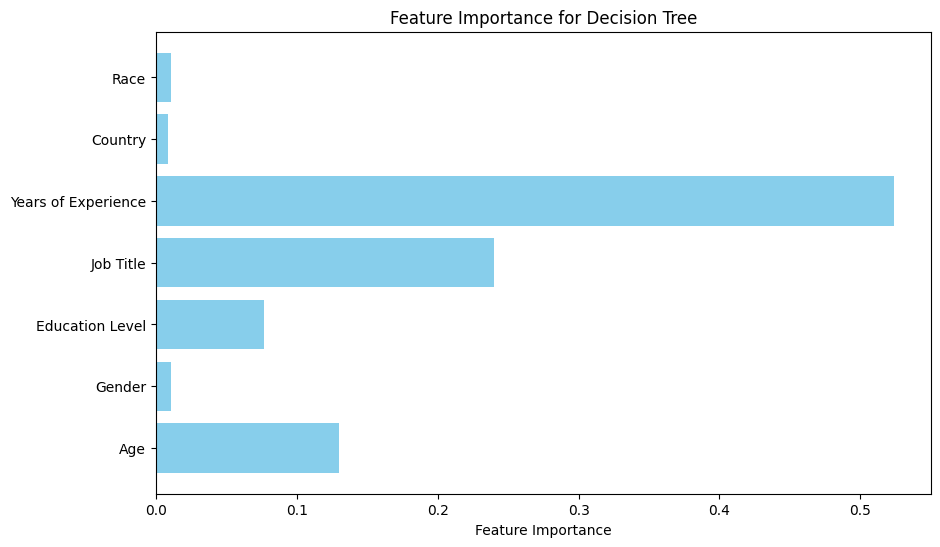

In [51]:
# Get feature importances
feature_importances = best_classtree.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()


In [52]:
# Predicting the target variable for both training and test data
y_train_pred = best_classtree.predict(X_train)  # Predictions on the training set
y_test_pred = best_classtree.predict(X_test)    # Predictions on the test set

# Comparing the actual vs predicted values for the test data
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nComparison of Actual vs Predicted Outputs:")
print(results_df.head())  # Displaying the first few rows of the comparison

# Evaluating model performance on training data
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report (Training Data):\n", classification_report(y_train, y_train_pred))

# Evaluating model performance on test data
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# Calculating the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Data: {accuracy}")



Comparison of Actual vs Predicted Outputs:
      Actual Predicted
5686  Medium    Medium
5852     Low       Low
2835    High      High
4731     Low       Low
1932    High      High
Confusion Matrix (Training Data):
 [[1403    0    0]
 [   0 1428    0]
 [   8    9 1380]]
Classification Report (Training Data):
               precision    recall  f1-score   support

        High       0.99      1.00      1.00      1403
         Low       0.99      1.00      1.00      1428
      Medium       1.00      0.99      0.99      1397

    accuracy                           1.00      4228
   macro avg       1.00      1.00      1.00      4228
weighted avg       1.00      1.00      1.00      4228

Confusion Matrix (Test Data):
 [[341   0  10]
 [  2 339  16]
 [ 11  16 322]]
Classification Report (Test Data):
               precision    recall  f1-score   support

        High       0.96      0.97      0.97       351
         Low       0.95      0.95      0.95       357
      Medium       0.93      0.

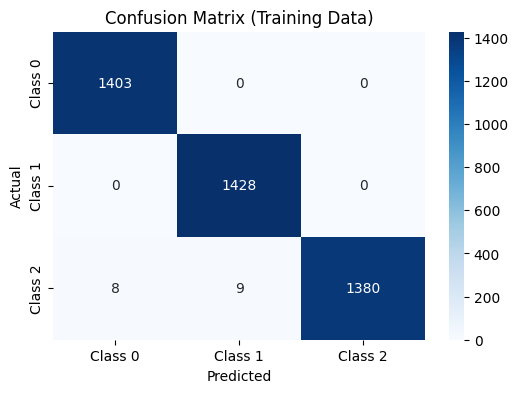

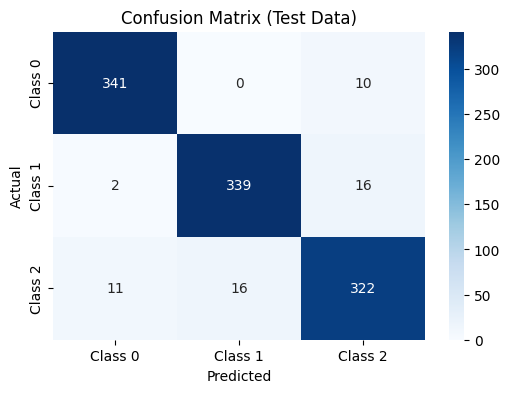

In [53]:

# Visualizing the confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Confusion Matrix (Training Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualizing the confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [54]:
# Function to display choices and get user input
def get_choice(prompt, options):
    print("\n" + prompt)
    for idx, option in enumerate(options, 1):
        print(f"{idx}. {option}")
    while True:
        try:
            choice = int(input("Enter the number of your choice: "))
            if 1 <= choice <= len(options):
                return choice - 1  # Return the index of the selected option
            else:
                print("Please select a valid option number.")
        except ValueError:
            print("Invalid input. Please enter a number.")

# Function to predict salary class
def predict_salary():
    print("\n==================== Predict Salary Class ====================")
    
    # Define the options for each feature
    age_options = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']
    gender_options = ['Male', 'Female']
    education_options = ["Bachelor's", "Master's", "PhD"]
    job_title_options = ['Developer', 'Manager', 'Engineer', 'Analyst', 'Consultant']
    experience_options = ['0-2', '3-5', '6-10', '11-15', '16-20', '21+']
    country_options = ['UK', 'USA', 'Canada', 'China', 'Australia']
    race_options = ['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian']

    # User inputs
    age = get_choice("Select Age Range:", age_options)
    gender = get_choice("Select Gender:", gender_options)
    education_level = get_choice("Select Education Level:", education_options)
    job_title = get_choice("Select Job Title:", job_title_options)
    experience = get_choice("Select Years of Experience:", experience_options)
    country = get_choice("Select Country:", country_options)
    race = get_choice("Select Race:", race_options)

    # Input data in the form of an array
    input_data = np.array([[age, gender, education_level, job_title, experience, country, race]])

    # Predict the salary class using the trained model
    try:
        salary_class_prediction = best_classtree.predict(input_data)
        print(f"\n==================== Predicted Salary Class ====================")
        print(f"Predicted Salary Class: {salary_class_prediction[0]}")
    except Exception as e:
        print("Error during prediction:", str(e))

# Call the prediction function
predict_salary()




==================== Predict Salary Class ====================

Select Age Range:
1. 20-25
2. 26-30
3. 31-35
4. 36-40
5. 41-45
6. 46-50
7. 51-55
8. 56-60

Select Gender:
1. Male
2. Female

Select Education Level:
1. Bachelor's
2. Master's
3. PhD

Select Job Title:
1. Developer
2. Manager
3. Engineer
4. Analyst
5. Consultant

Select Years of Experience:
1. 0-2
2. 3-5
3. 6-10
4. 11-15
5. 16-20
6. 21+

Select Country:
1. UK
2. USA
3. Canada
4. China
5. Australia

Select Race:
1. White
2. Hispanic
3. Asian
4. Korean
5. Chinese
6. Australian

==================== Predicted Salary Class ====================
Predicted Salary Class: Low


In [55]:
edit_data = row_data
edit_data

Age  Gender            Education Level              Job Title  \
0     32.0    Male         Bachelor's Degrees      Software Engineer   
1     28.0  Female           Master's Degrees           Data Analyst   
2     45.0    Male                        PhD         Senior Manager   
3     36.0  Female         Bachelor's Degrees        Sales Associate   
4     52.0    Male           Master's Degrees               Director   
...    ...     ...                        ...                    ...   
6699  49.0  Female                        PhD  Director of Marketing   
6700  32.0    Male                High School        Sales Associate   
6701  30.0  Female  Bachelor's Degrees Degree      Financial Manager   
6702  46.0    Male    Master's Degrees Degree      Marketing Manager   
6703  26.0  Female                High School        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                    15.0  150000.0     Canada       White       1  
3                     7.0   60000.0        USA    Hispanic       0  
4                    20.0  200000.0        USA       Asian       0  
...                   ...       ...        ...         ...     ...  
6699                 20.0  200000.0         UK       Mixed       1  
6700                  3.0   50000.0  Australia  Australian       0  
6701                  4.0   55000.0      China     Chinese       1  
6702                 14.0  140000.0      China      Korean       1  
6703                  1.0   35000.0     Canada       Black       0  

[6700 rows x 9 columns]

In [56]:
# Encode using the fitted encoder
edit_data['Education Level'] = le_edu.transform(edit_data['Education Level'])
edit_data['Gender'] = le_gender.transform(edit_data['Gender'])
edit_data['Job Title'] = le_job.transform(edit_data['Job Title'])
edit_data['Country'] = le_country.transform(edit_data['Country'])
edit_data['Race'] = le_race.transform(edit_data['Race'])
edit_data.duplicated().sum()


np.int64(1414)

In [57]:
edit_data = edit_data.drop_duplicates()
edit_data.duplicated().sum()

np.int64(0)

In [58]:
edit_data

Age  Gender  Education Level  Job Title  Years of Experience    Salary  \
0     32.0       1                0        175                  5.0   90000.0   
1     28.0       0                3         18                  3.0   65000.0   
2     45.0       1                5        144                 15.0  150000.0   
3     36.0       0                0        115                  7.0   60000.0   
4     52.0       1                3         25                 20.0  200000.0   
...    ...     ...              ...        ...                  ...       ...   
6698  37.0       1                1         83                  6.0   75000.0   
6699  49.0       0                5         33                 20.0  200000.0   
6700  32.0       1                2        115                  3.0   50000.0   
6701  30.0       0                1         41                  4.0   55000.0   
6702  46.0       1                4         96                 14.0  140000.0   

      Country  Race  Senior  
0           3     9       0  
1           4     5       0  
2           1     9       1  
3           4     5       0  
4           4     1       0  
...       ...   ...     ...  
6698        1     1       1  
6699        3     7       1  
6700        0     2       0  
6701        2     4       1  
6702        2     6       1  

[5286 rows x 9 columns]

In [59]:
# Define a list of column names to use for plotting against 'Salary'
col_names = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 
             'Country', 'Race', 'Senior']

# Define the number of rows and columns for the subplot grid
nrow = 4  # Number of rows in the grid
ncol = 2  # Number of columns in the grid

# Create a figure with a grid of subplots (4 rows x 2 columns)
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 15))  
# `figsize` specifies the overall size of the figure

# Loop through each subplot in the grid
for i in range(nrow):  # Loop over the rows
    for j in range(ncol):  # Loop over the columns
        # Plot a scatter plot for each feature in 'col_names' against 'Salary'
        axes[i, j].scatter(
            edit_data[col_names[i * ncol + j]],  # X-axis: Feature column
            edit_data['Salary'],  # Y-axis: 'Salary' column
            alpha=0.3  # Transparency of the points
        )
        
        # Set the title for the current subplot
        axes[i, j].set_title(f'Scatter Plot of Age against {col_names[i * ncol + j]}')
        
        # Label the X-axis with the corresponding feature name
        axes[i, j].set_xlabel(col_names[i * ncol + j])
        
        # Label the Y-axis as 'The Salary'
        axes[i, j].set_ylabel('The Salary')
        
        # Add a grid to the current subplot for better readability
        axes[i, j].grid(True)

# Automatically adjust subplot parameters to ensure a clean layout
plt.tight_layout()

# Display the entire figure with all subplots
plt.show()

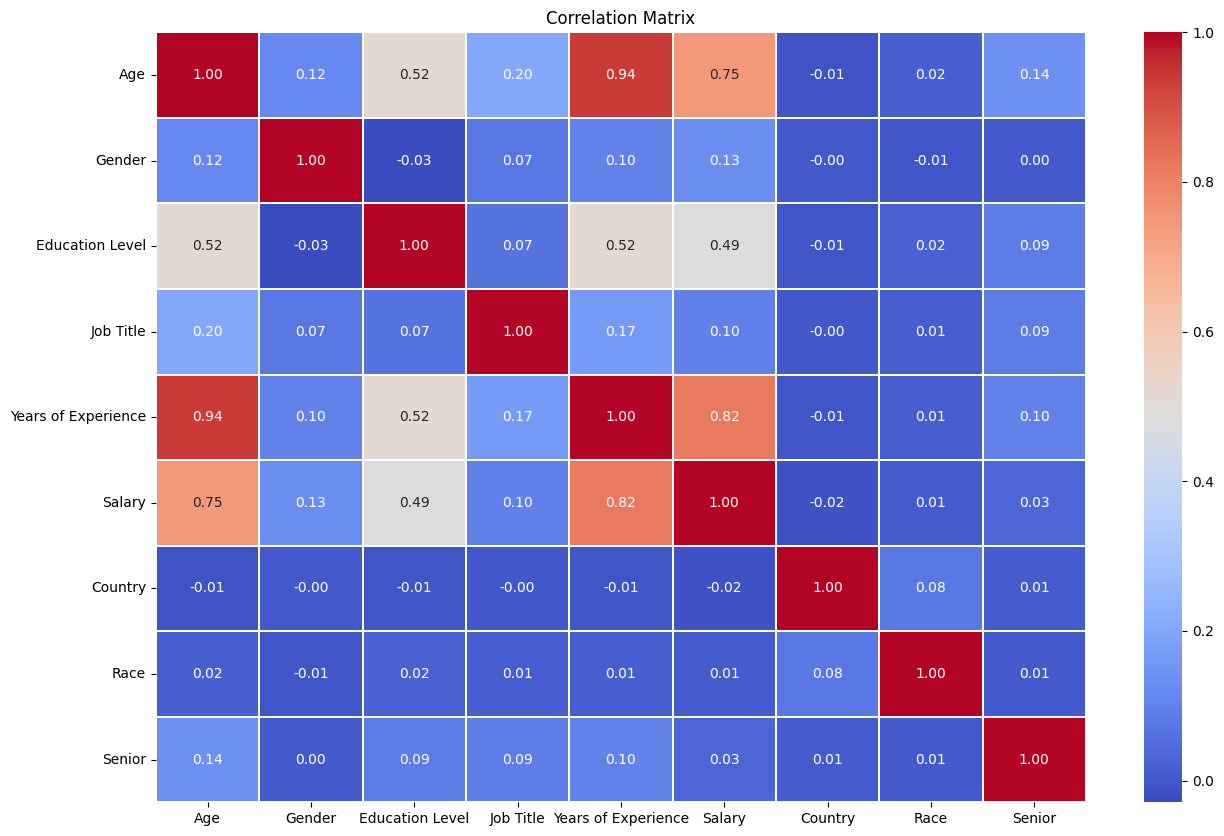

In [60]:
# Calculate the correlation matrix for the numerical columns in the DataFrame
correlation_matrix = edit_data.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(15, 10))

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,  # Data to visualize
    annot=True,          # Display correlation values on the heatmap
    cmap='coolwarm',     # Use the 'coolwarm' colormap for visual aesthetics
    fmt=".2f",           # Format the correlation values to two decimal places
    linewidths=.3        # Add spacing between cells for better readability
)

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


In [61]:
# Extract the correlation of all features with 'Salary' and exclude 'Salary' itself
correlation_with_salary = correlation_matrix['Salary'].drop('Salary')
correlation_with_salary

Age                    0.746281
Gender                 0.131373
Education Level        0.491209
Job Title              0.099275
Years of Experience    0.816009
Country               -0.015040
Race                   0.009187
Senior                 0.032686
Name: Salary, dtype: float64

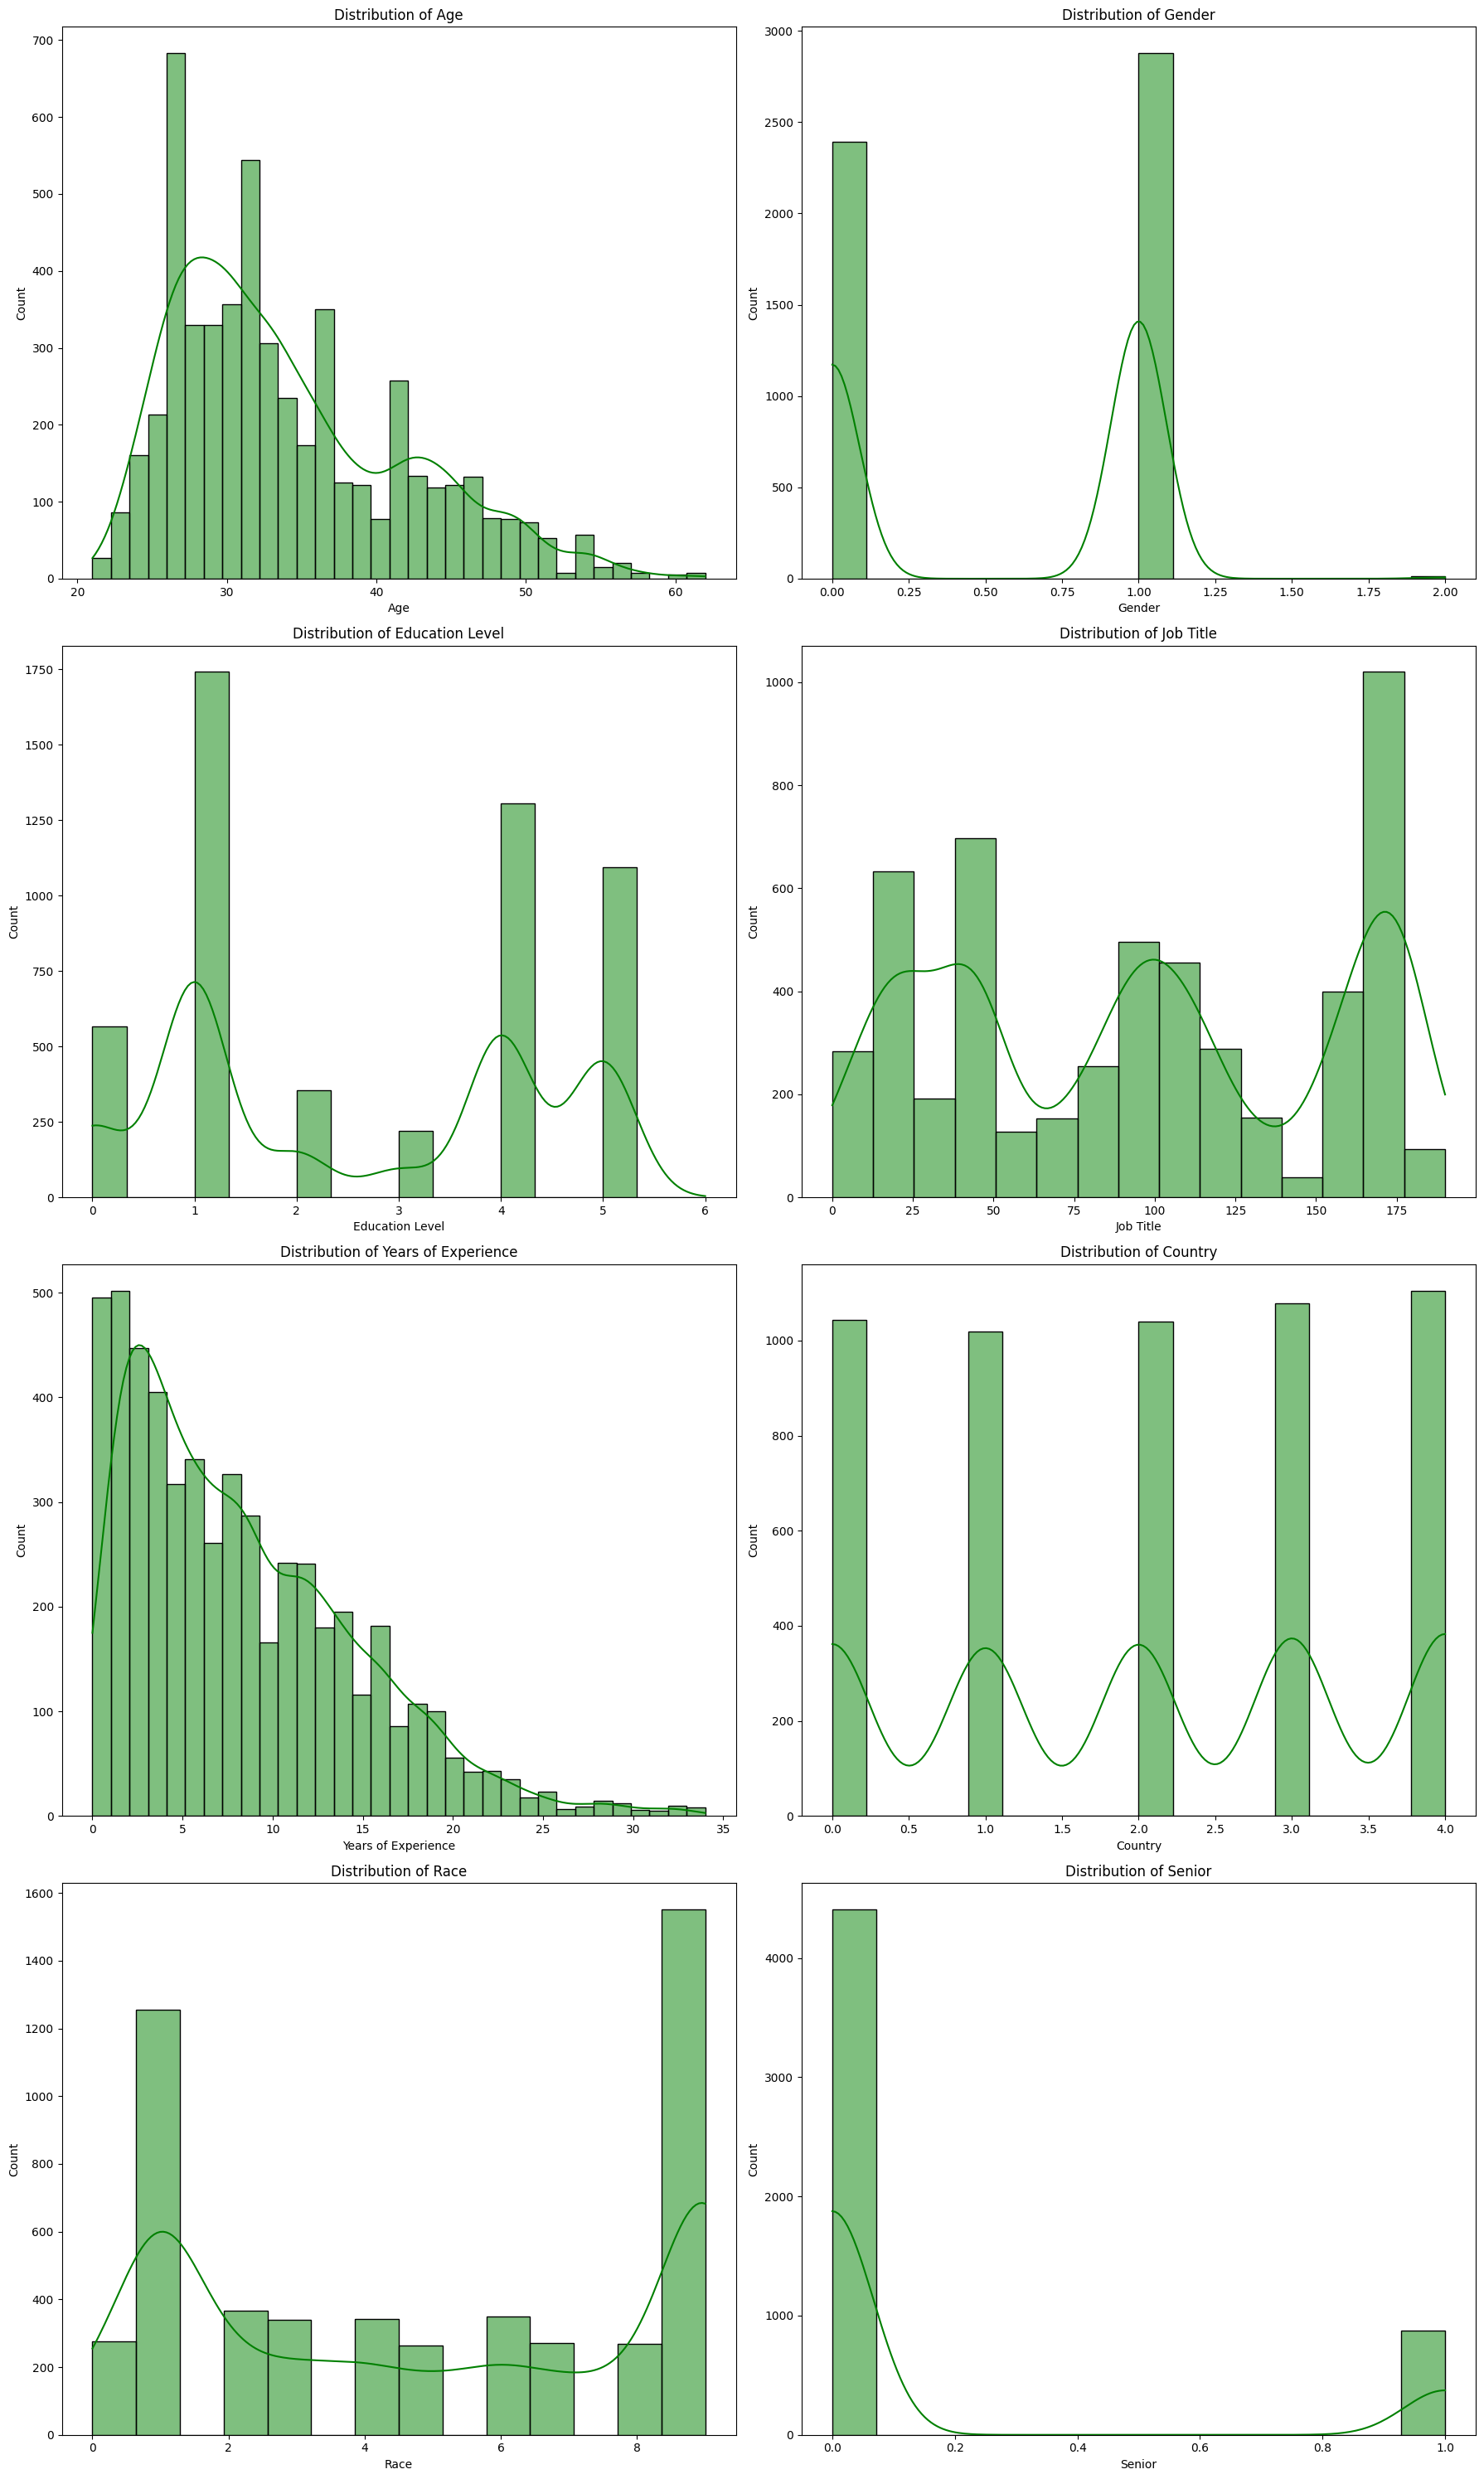

In [62]:
# Define a function for plotting histograms
def Plot(df, col_name, color):
    sns.histplot(df[col_name], kde=True, color=color)  # Use df[col_name] instead of data[col_name]
    plt.title(f'Distribution of {col_name}')  # Set the title for the plot
    plt.xlabel(col_name)  # Set the x-axis label

# List of column names to plot
col_names2 = ['Age', 'Gender', 'Education Level', 'Job Title', 
              'Years of Experience', 'Country', 'Race', 'Senior']

# Adjust grid dimensions
nrow2 = 4  # Number of rows in the grid
ncol2 = 2  # Number of columns in the grid
n_plots = len(col_names2)  # Number of plots to create

# Set figure size
plt.figure(figsize=(18, 30))

# Loop through each column and plot histograms
for x in range(n_plots):
    plt.subplot(nrow2, ncol2, x + 1)  # Create a subplot in the grid
    Plot(edit_data, col_names2[x], 'green')  # Call the Plot function for each column

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [63]:
edit_data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Selecting features (independent variables) and target (dependent variable)
features = edit_data[['Age', 'Years of Experience', 'Education Level']]  # Independent variables
target = edit_data['Salary']  # Dependent variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)  
# Initializing the linear regression model
linear_model = LinearRegression()

# Training (fitting) the model on the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Making predictions on the test data
y_test_pred = linear_model.predict(X_test)

# Calculating performance metrics for the test data
mse_test = mean_squared_error(y_test, y_test_pred)  # Mean Squared Error for test data
r2_test = r2_score(y_test, y_test_pred)  # R² score for test data

# Making predictions on the training data
y_train_pred = linear_model.predict(X_train)

# Calculating performance metrics for the training data
mse_train = mean_squared_error(y_train, y_train_pred)  # Mean Squared Error for training data
r2_train = r2_score(y_train, y_train_pred)  # R² score for training data

# Displaying the model coefficients and intercept
print("Model Coefficients:", linear_model.coef_)  # The weights for each feature
print("Model Intercept:", linear_model.intercept_)  # The y-intercept of the regression line
print(f"Training Data - Mean Squared Error (MSE): {mse_train}")
print(f"Training Data - R² Score: {r2_train}")
print(f"Test Data - Mean Squared Error (MSE): {mse_test}")
print(f"Test Data - R² Score: {r2_test}")

# Calculating Adjusted R² for training data
n_train = len(y_train)  # Number of samples in training data
p_features = X_train.shape[1]  # Number of independent variables (features)

# Adjusted R² formula for training data
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_features - 1)
print(f"Training Data - Adjusted R²: {adjusted_r2_train}")

Model Coefficients: [-1121.16123599  7748.68280353  3015.88205978]
Model Intercept: 79806.18873373099
Training Data - Mean Squared Error (MSE): 879692982.2871859
Training Data - R² Score: 0.6818769034334466
Test Data - Mean Squared Error (MSE): 924931056.0614558
Test Data - R² Score: 0.6530624361622255
Training Data - Adjusted R²: 0.6816509637341807


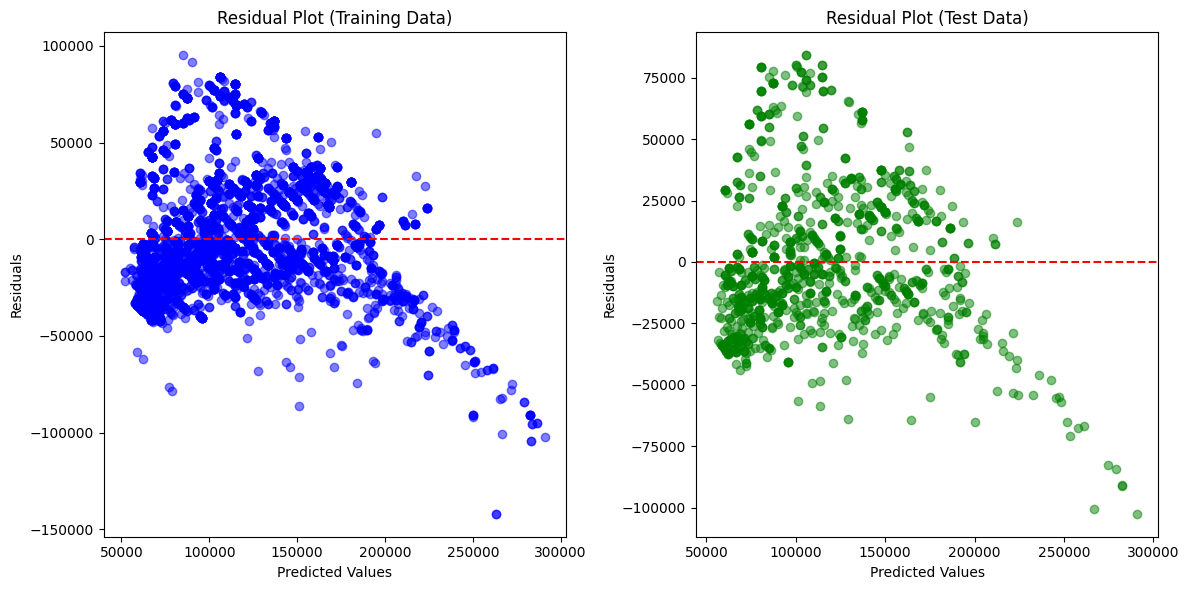

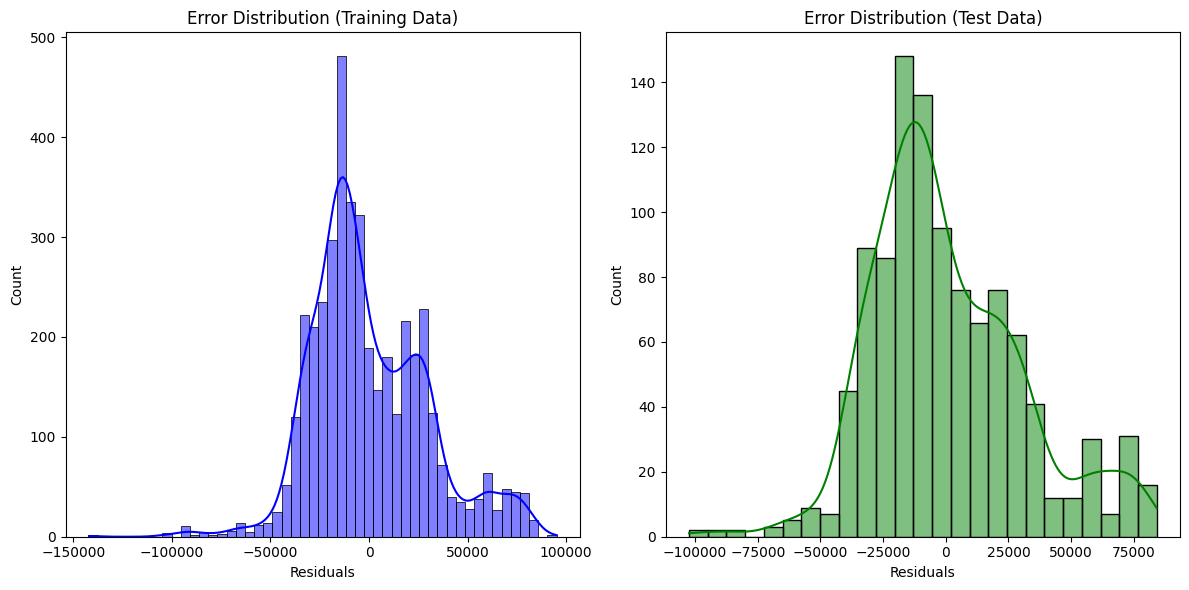

In [66]:
# Calculate residuals (errors) for training and test data
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plotting residuals vs predicted values (for training and test data)

# Training Data Residual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.title('Residual Plot (Training Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Test Data Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.title('Residual Plot (Test Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Plotting the distribution of residuals

# Training Data Error Distribution (Histogram)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='blue')
plt.title('Error Distribution (Training Data)')
plt.xlabel('Residuals')

# Test Data Error Distribution (Histogram)
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color='green')
plt.title('Error Distribution (Test Data)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

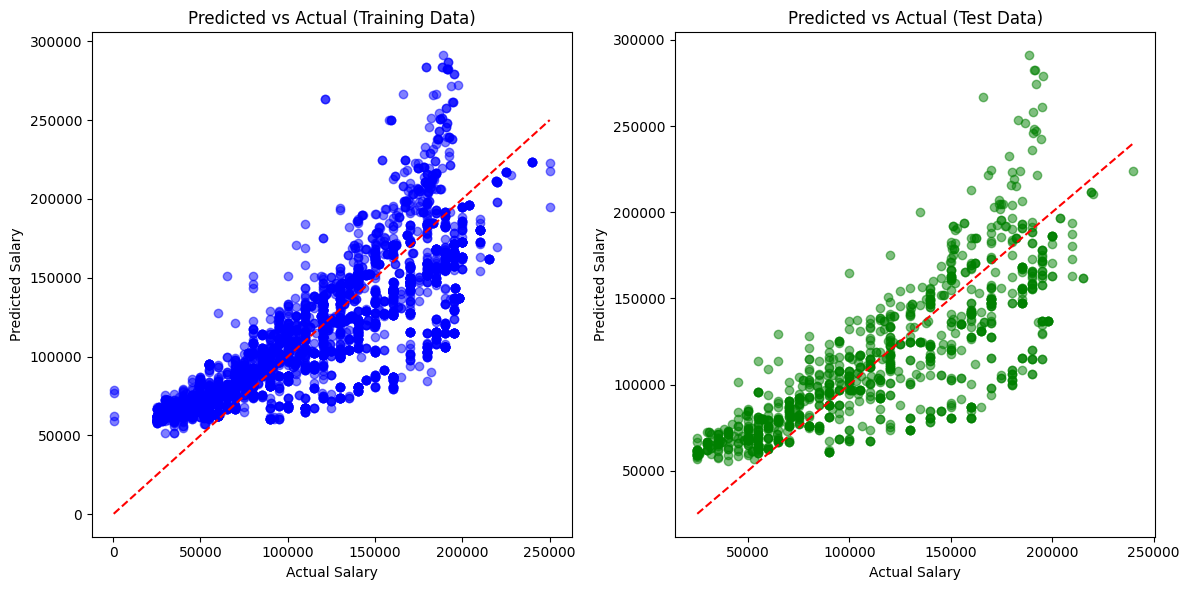

In [67]:
import matplotlib.pyplot as plt

# Plotting Predicted vs Actual Values

# Training Data Predicted vs Actual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs Actual (Training Data)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')

# Test Data Predicted vs Actual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs Actual (Test Data)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')

plt.tight_layout()
plt.show()


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Separate features and target variable
X = edit_data.drop(columns=['Salary'])  # Features (independent variables)
y = edit_data["Salary"]  # Target variable (dependent variable)

# Step 2: Feature Importance Analysis using RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X, y)  # Fit the RandomForestRegressor model to the data

# Extract and display feature importances (how important each feature is in predicting the target)
feature_importance = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Years of Experience    0.758744
Job Title              0.117806
Age                    0.055233
Education Level        0.054719
Gender                 0.006569
Race                   0.003050
Country                0.002536
Senior                 0.001343
dtype: float64


In [69]:
# Step 3: Select the top 4 most important features based on the feature importance
top_features = feature_importance.head(4).index  # Select the top 4 most important features
X = X[top_features]  # Update the feature set with only the selected features

# Step 4: Train-Test Split (Split the data into training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Step 5: Polynomial Feature Transformation (Creating polynomial features to capture non-linear relationships)
poly = PolynomialFeatures(degree=4)  # Creating polynomial features up to degree 4
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform test data using the same polynomial features

# Step 6: Standardize Data (Standardizing features to have zero mean and unit variance)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)  # Standardize training data
X_test_poly = scaler.transform(X_test_poly)  # Standardize test data (using the same scaling parameters)

# Step 7: Train Polynomial Regression Model (Linear Regression on polynomial features)
poly_model = LinearRegression()  # Instantiate a linear regression model
poly_model.fit(X_train_poly, y_train)  # Fit the model to the training data

LinearRegression()

In [70]:
# Step 8: Predictions on Test Data (Make predictions on the test set)
y_pred_test = poly_model.predict(X_test_poly)  # Predict salaries using the polynomial features of the test data

# Step 9: Model Evaluation (Evaluate the model using Mean Squared Error and R-squared)
mse_test = mean_squared_error(y_test, y_pred_test)  # Calculate Mean Squared Error on test data
r2_test = r2_score(y_test, y_pred_test)  # Calculate R-squared score on test data

print(f"Test Data Mean Squared Error: {mse_test}")
print(f"Test Data R^2 Score: {r2_test}")

# Step 10: Predictions on Training Data (Make predictions on the training set)
y_pred_train = poly_model.predict(X_train_poly)  # Predict salaries using the polynomial features of the training data

# Step 11: Model Evaluation on Training Data
mse_train = mean_squared_error(y_train, y_pred_train)  # Calculate Mean Squared Error on training data
r2_train = r2_score(y_train, y_pred_train)  # Calculate R-squared score on training data

print(f"Training Data Mean Squared Error: {mse_train}")
print(f"Training Data R^2 Score: {r2_train}")


Test Data Mean Squared Error: 337994153.18630993
Test Data R^2 Score: 0.8738288487927854
Training Data Mean Squared Error: 328856452.69752866
Training Data R^2 Score: 0.8811251513150501


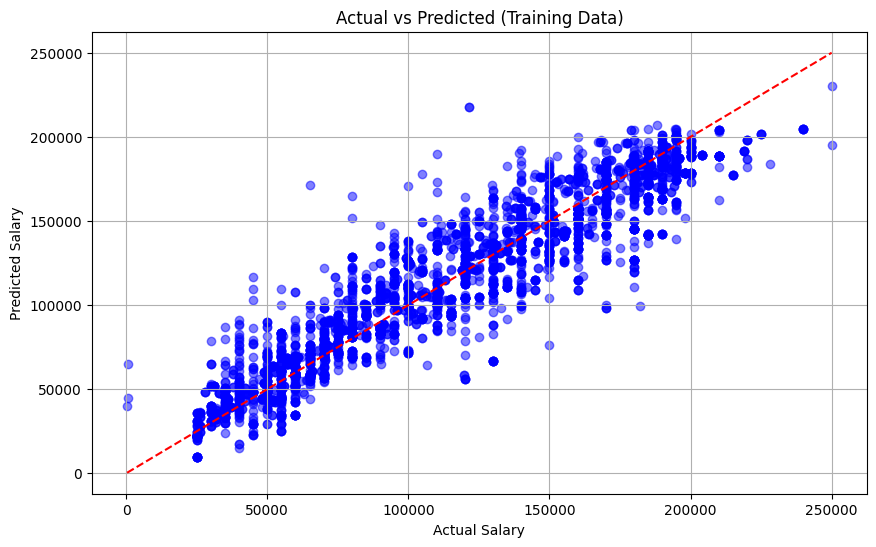

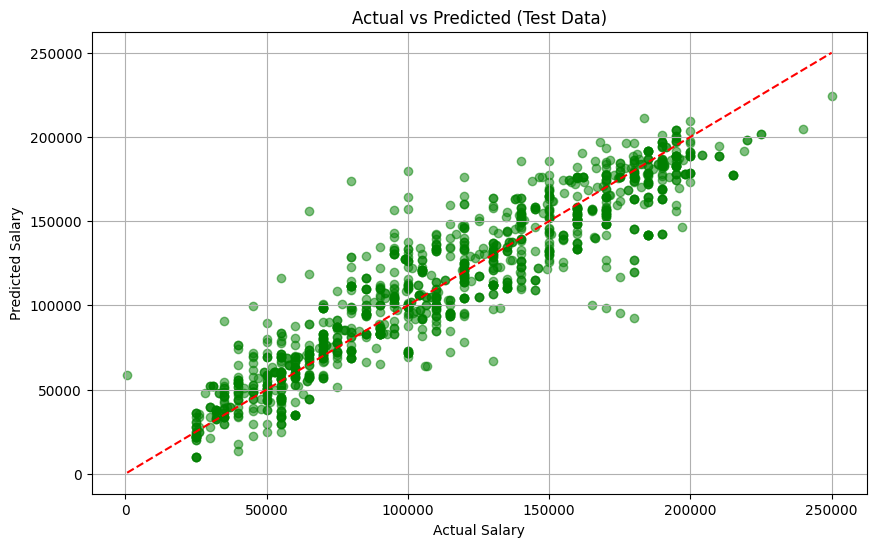

In [71]:
# 1. Actual vs Predicted for Training Data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # 45-degree line
plt.title("Actual vs Predicted (Training Data)")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.show()

# 2. Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title("Actual vs Predicted (Test Data)")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.show()

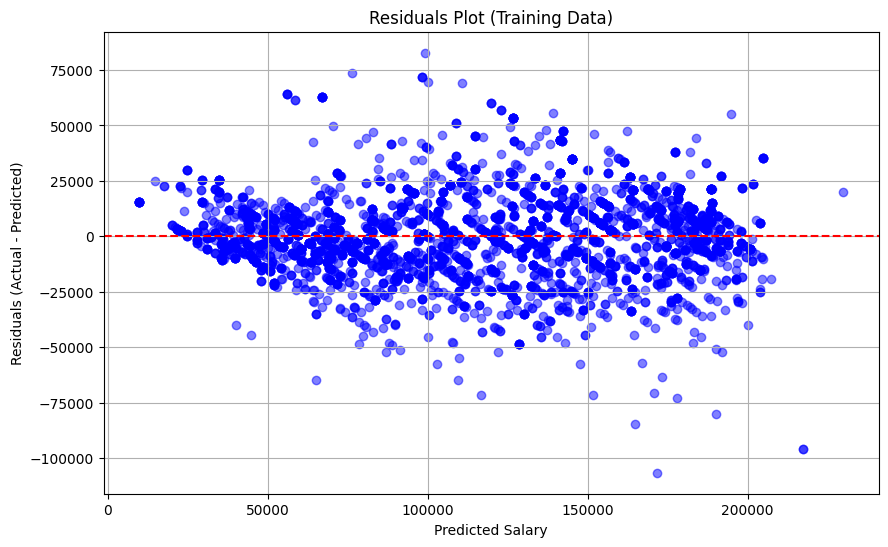

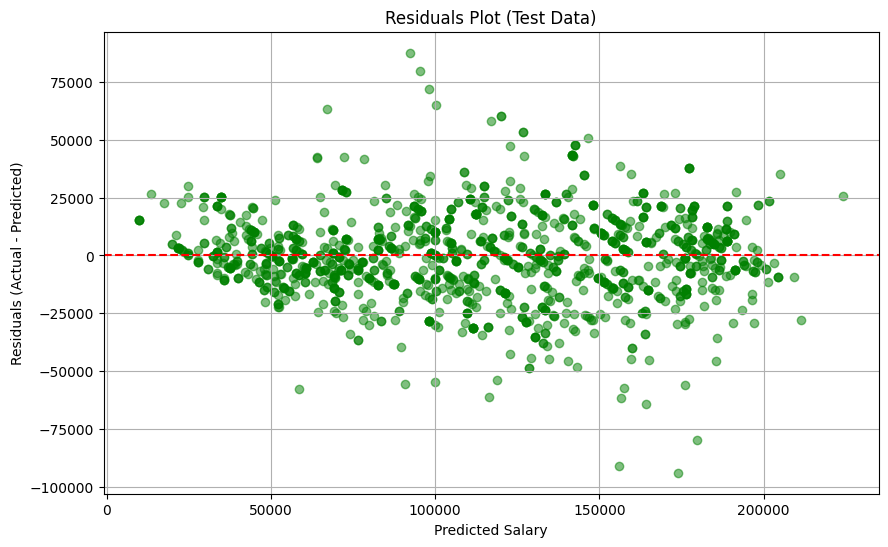

In [72]:
# 1. Residuals Plot (Training Data)
residuals_train = y_train - y_pred_train
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title("Residuals Plot (Training Data)")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

# 2. Residuals Plot (Test Data)
residuals_test = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title("Residuals Plot (Test Data)")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


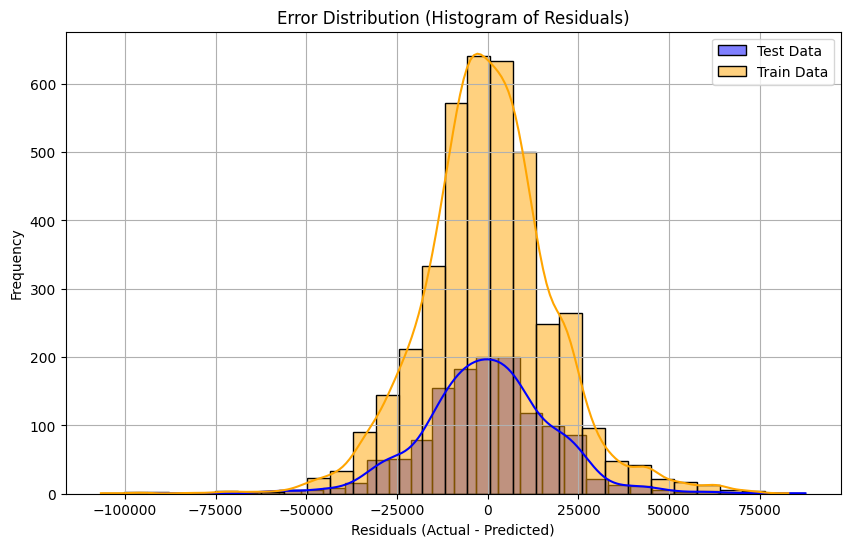

In [73]:
# --- Plot 3: Error Distribution (Histogram of Residuals) ---
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, kde=True, color='blue', label='Test Data', bins=30, alpha=0.5)
sns.histplot(residuals_train, kde=True, color='orange', label='Train Data', bins=30, alpha=0.5)
plt.title("Error Distribution (Histogram of Residuals)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [74]:
import sqlite3

# Connect to the database
connection = sqlite3.connect("employes_databse1_.db")
cursor = connection.cursor()

# Create the employees table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS employees (
    Employee_ID INTEGER PRIMARY KEY,
    Age INTEGER,
    Gender TEXT,
    Education_Level TEXT,
    Job_Title TEXT,
    Years_of_Experience INTEGER,
    Race TEXT,
    Country TEXT,
    Senior INTEGER
)
""")

# List of employees to insert with updated data
employees = [
    (1, 33, 'Female', "Master's", 'Marketing Manager', 7, 'Hispanic', 'USA', 0),
    (2, 39, 'Male', 'PhD', 'Senior Engineer', 12,  'Mixed', 'UK', 1),
    (3, 25, 'Female', "Bachelor's", 'Data Entry Clerk', 0, 'Mixed', 'UK', 0),
    (4, 51, 'Male', "Bachelor's", 'Sales Director', 22, 'Mixed', 'Australia', 1),
    (5, 34, 'Female', "Master's", 'Business Analyst', 5, 'Korean', 'China', 0),
    (6, 47, 'Male', "Master's", 'VP of Operations', 19, 'White', 'UK', 0),
    (7, 30, 'Male', "Bachelor's", 'IT Support', 2, 'Mixed', 'UK', 0),
    (8, 36, 'Female', "Bachelor's", 'Recruiter', 9, 'White', 'China', 0),
    (9, 41, 'Male', "Master's", 'Financial Manager', 13, 'Hispanic', 'USA', 0),
    (10, 28, 'Female', "Bachelor's", 'Social Media Specialist', 3, 'White', 'Canada', 0)
]

# Insert employee data into the database
cursor.executemany("""
INSERT INTO employees (Employee_ID, Age, Gender, Education_Level, Job_Title, Years_of_Experience, Race, Country, Senior)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
""", employees)

# Commit changes and close the connection
connection.commit()


In [75]:
import pandas as pd

# Connect to SQLite and retrieve data
connection = sqlite3.connect("employes_databse1_.db")
query = "SELECT * FROM employees"
new_Data = pd.read_sql_query(query, connection)

new_Data

Employee_ID  Age  Gender Education_Level                Job_Title  \
0            1   33  Female        Master's        Marketing Manager   
1            2   39    Male             PhD          Senior Engineer   
2            3   25  Female      Bachelor's         Data Entry Clerk   
3            4   51    Male      Bachelor's           Sales Director   
4            5   34  Female        Master's         Business Analyst   
5            6   47    Male        Master's         VP of Operations   
6            7   30    Male      Bachelor's               IT Support   
7            8   36  Female      Bachelor's                Recruiter   
8            9   41    Male        Master's        Financial Manager   
9           10   28  Female      Bachelor's  Social Media Specialist   

   Years_of_Experience      Race    Country  Senior  
0                    7  Hispanic        USA       0  
1                   12     Mixed         UK       1  
2                    0     Mixed         UK       0  
3                   22     Mixed  Australia       1  
4                    5    Korean      China       0  
5                   19     White         UK       0  
6                    2     Mixed         UK       0  
7                    9     White      China       0  
8                   13  Hispanic        USA       0  
9                    3     White     Canada       0

In [76]:
cursor.execute('SELECT * FROM  employees')
rows = cursor.fetchall()
# Create a DataFrame from retrieved records
employee_data2 = pd.DataFrame(rows, columns=['Employee_ID','Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience','Race','Country','Senior'])
employee_data2

Employee_ID  Age  Gender Education Level                Job Title  \
0            1   33  Female        Master's        Marketing Manager   
1            2   39    Male             PhD          Senior Engineer   
2            3   25  Female      Bachelor's         Data Entry Clerk   
3            4   51    Male      Bachelor's           Sales Director   
4            5   34  Female        Master's         Business Analyst   
5            6   47    Male        Master's         VP of Operations   
6            7   30    Male      Bachelor's               IT Support   
7            8   36  Female      Bachelor's                Recruiter   
8            9   41    Male        Master's        Financial Manager   
9           10   28  Female      Bachelor's  Social Media Specialist   

   Years of Experience      Race    Country  Senior  
0                    7  Hispanic        USA       0  
1                   12     Mixed         UK       1  
2                    0     Mixed         UK       0  
3                   22     Mixed  Australia       1  
4                    5    Korean      China       0  
5                   19     White         UK       0  
6                    2     Mixed         UK       0  
7                    9     White      China       0  
8                   13  Hispanic        USA       0  
9                    3     White     Canada       0

In [77]:
# Apply the function to the Education column
employee_data2['Education Level'] = employee_data2['Education Level'].apply(standardize_masters)
# Display the result
# Apply the function to the Education column
employee_data2['Education Level'] = employee_data2['Education Level'].apply(standardize_bachelors)
print(employee_data2)

   Employee_ID  Age  Gender     Education Level                Job Title  \
0            1   33  Female    Master's Degrees        Marketing Manager   
1            2   39    Male                 PhD          Senior Engineer   
2            3   25  Female  Bachelor's Degrees         Data Entry Clerk   
3            4   51    Male  Bachelor's Degrees           Sales Director   
4            5   34  Female    Master's Degrees         Business Analyst   
5            6   47    Male    Master's Degrees         VP of Operations   
6            7   30    Male  Bachelor's Degrees               IT Support   
7            8   36  Female  Bachelor's Degrees                Recruiter   
8            9   41    Male    Master's Degrees        Financial Manager   
9           10   28  Female  Bachelor's Degrees  Social Media Specialist   

   Years of Experience      Race    Country  Senior  
0                    7  Hispanic        USA       0  
1                   12     Mixed         UK       1  
2

In [78]:
# Encode using the fitted encoder
employee_data2['Education Level'] = le_edu.transform(employee_data2['Education Level'])
employee_data2['Gender'] = le_gender.transform(employee_data2['Gender'])
employee_data2['Job Title'] = le_job.transform(employee_data2['Job Title'])
employee_data2['Country'] = le_country.transform(employee_data2['Country'])
employee_data2['Race'] = le_race.transform(employee_data2['Race'])

In [79]:
new_data_poly = poly.transform(employee_data2[top_features])  
new_data_poly_scaled = scaler.transform(new_data_poly)

In [81]:
y_pred_new = poly_model.predict(new_data_poly_scaled)

print("Predictions for new data:", y_pred_new)

Predictions for new data: [111317.53463067 143505.88807889  66848.24282558 110914.32726009
  91422.51499939 176370.56519805  43858.00809831 108038.995188
 151758.09469977 116763.6555264 ]


In [83]:
# Check DataFrame type
print("DataFrame Employee_ID Type:", type(employee_data2.iloc[0]['Employee_ID']))

# Check Database type
cursor.execute('SELECT Employee_ID FROM employees')
print("Database Employee_ID Type:", type(cursor.fetchone()[0]))


DataFrame Employee_ID Type: <class 'numpy.int64'>
Database Employee_ID Type: <class 'int'>


In [84]:
employee_id = int(employee_data2.iloc[i]['Employee_ID'])

In [86]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('employes_databse_.db')
cursor = conn.cursor()

# Check if the 'salary' column exists
cursor.execute("PRAGMA table_info(employees)")
columns = [info[1] for info in cursor.fetchall()]  # Get column names

if 'salary' not in columns:
    # Add the 'salary' column to the employees table
    cursor.execute('''
        ALTER TABLE employees
        ADD COLUMN salary REAL
    ''')
    conn.commit()
    print("Column 'salary' added successfully.")
else:
    print("Column 'salary' already exists.")

# Ensure IDs and salaries are properly updated
for i, salary in enumerate(y_pred_new):
    # Extract Employee_ID as an integer
    employee_id = int(employee_data2.iloc[i]['Employee_ID'])

    # Update salary for the matching Employee_ID
    cursor.execute('''
        UPDATE employees
        SET salary = ?
        WHERE Employee_ID = ?
    ''', (float(salary), employee_id))

# Commit the updates
conn.commit()

# Verify the updates
cursor.execute('SELECT * FROM employees')
updated_employees = cursor.fetchall()

print("\nUpdated Employee Records with Salaries:")
for employee in updated_employees:
    print(employee)

# Close the database connection
conn.close()


Column 'salary' already exists.

Updated Employee Records with Salaries:
(1, 26, 'Male', 'Diploma', 'Technician', 3, 'Hispanic', 'Canada', 0, 111317.53463067384)
(2, 40, 'Female', 'PhD', 'Research Scientist', 15, 'Asian', 'Germany', 1, 143505.88807889284)
(3, 30, 'Male', 'Bachelor', 'Analyst', 7, 'African American', 'USA', 0, 66848.24282558473)
(4, 28, 'Female', 'Master', 'Consultant', 4, 'Caucasian', 'UK', 1, 110914.32726009215)
(5, 50, 'Male', 'PhD', 'Manager', 25, 'Asian', 'India', 1, 91422.51499938733)
(6, 34, 'Female', 'Diploma', 'Designer', 8, 'Hispanic', 'Mexico', 0, 176370.56519804877)
(7, 29, 'Male', 'Bachelor', 'Developer', 5, 'Caucasian', 'Australia', 0, 43858.00809831011)
(8, 32, 'Female', 'Master', 'Engineer', 10, 'African American', 'USA', 1, 108038.99518800365)
(9, 41, 'Male', 'PhD', 'Professor', 18, 'Asian', 'China', 1, 151758.0946997744)
(10, 36, 'Female', 'Bachelor', 'Architect', 12, 'Caucasian', 'Canada', 0, 116763.65552640359)
